In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

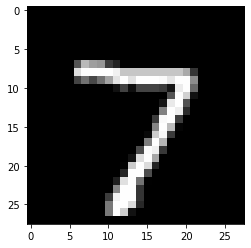

In [5]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Capa de entrada
  tf.keras.layers.Dense(128, activation='relu'), # Capa oculta
  # ...
  tf.keras.layers.Dense(10, activation='softmax') # Capa de salida
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
def get_label(x, y, model):
  output = model.predict(x.reshape(1,28,28)) 
  plt.imshow(x, cmap='gray')
  title = f'Real Label: {y}. Predicted Label: {output.argmax()}'
  plt.title(title)
  plt.show()

1/1 [==============================] - 0s 257ms/step


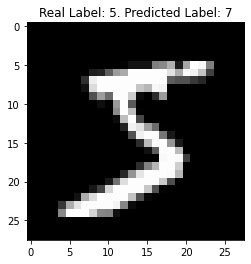

1/1 [==============================] - 0s 18ms/step


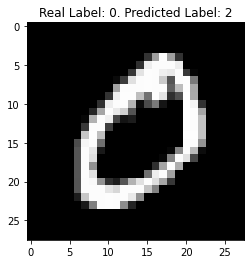

1/1 [==============================] - 0s 16ms/step


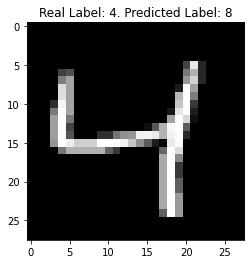

1/1 [==============================] - 0s 26ms/step


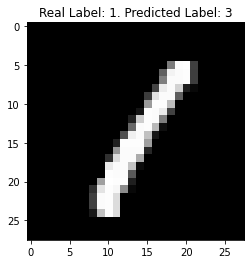

1/1 [==============================] - 0s 19ms/step


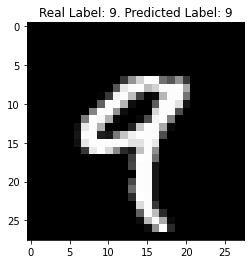

1/1 [==============================] - 0s 18ms/step


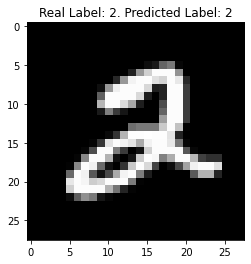

1/1 [==============================] - 0s 23ms/step


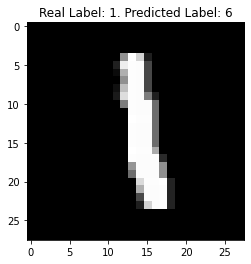

1/1 [==============================] - 0s 19ms/step


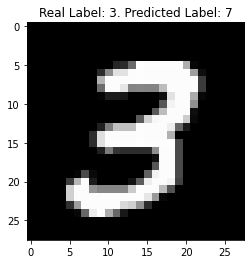

1/1 [==============================] - 0s 20ms/step


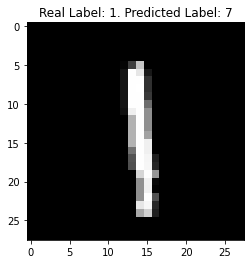

1/1 [==============================] - 0s 21ms/step


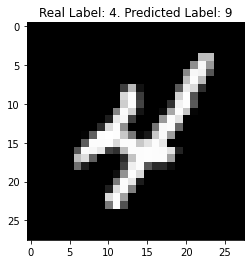

In [9]:
for i in range(10):
  get_label(x_train[i], y_train[i], model)

In [10]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# train model
history = model.fit(x_train, y_train, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.6907 - accuracy: 0.8264 - val_loss: 0.3277 - val_accuracy: 0.9137
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3540 - accuracy: 0.9023 - val_loss: 0.2651 - val_accuracy: 0.9290
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3013 - accuracy: 0.9151 - val_loss: 0.2319 - val_accuracy: 0.9367
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2695 - accuracy: 0.9239 - val_loss: 0.2119 - val_accuracy: 0.9422
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2456 - accuracy: 0.9306 - val_loss: 0.1972 - val_accuracy: 0.9470
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2264 - accuracy: 0.9362 - val_loss: 0.1829 - val_accuracy: 0.9512
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2110 - accuracy: 0.9409 - val_loss: 0.1706 - val_accuracy:

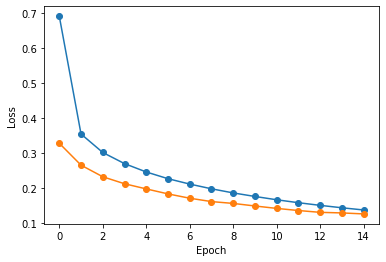

In [12]:
# Visualize training loss
plt.plot(history.history['loss'], marker='o', label='train')
plt.plot(history.history['val_loss'], marker='o', label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

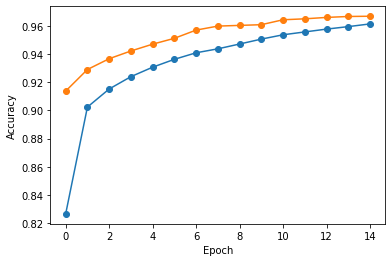

In [13]:
# Visualize training accuracy
plt.plot(history.history['accuracy'], marker='o', label='train')
plt.plot(history.history['val_accuracy'], marker='o', label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.1418 - accuracy: 0.9585


[0.14182905852794647, 0.9585000276565552]

1/1 [==============================] - 0s 53ms/step


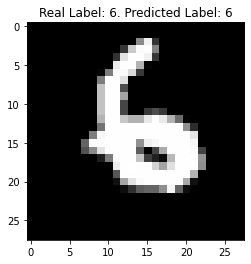

1/1 [==============================] - 0s 23ms/step


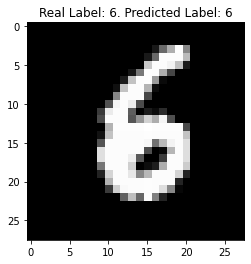

1/1 [==============================] - 0s 19ms/step


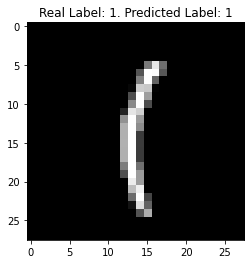

1/1 [==============================] - 0s 21ms/step


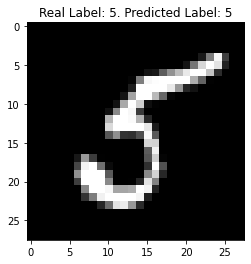

1/1 [==============================] - 0s 17ms/step


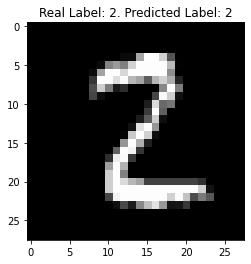

In [14]:
# Predictions train
for i in np.random.randint(0, x_train.shape[0], size=5):
  get_label(x_train[i], y_train[i], model)

1/1 [==============================] - 0s 17ms/step


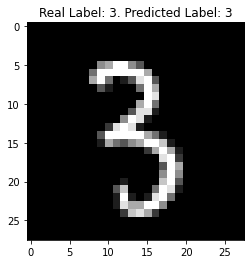

1/1 [==============================] - 0s 17ms/step


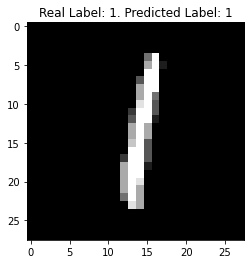

1/1 [==============================] - 0s 18ms/step


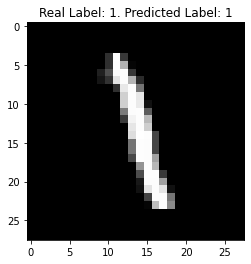

1/1 [==============================] - 0s 19ms/step


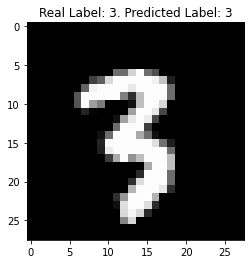

1/1 [==============================] - 0s 18ms/step


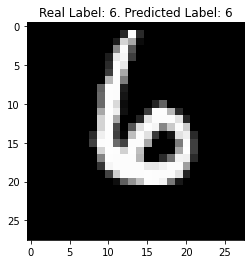

In [15]:
# Predictions test
for i in np.random.randint(0, x_test.shape[0], size=5):
  get_label(x_test[i], y_test[i], model)